# Predicting Stock price Using Linear Regression model

## Step 1:- Data Collection

### Imporing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Imporing Dataset 

In [3]:
df=pd.read_csv(r"TATAMOTORS.NS.csv")

In [5]:
df.head() #this data set has 7 features 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-01,173.042435,173.042435,155.268692,161.515854,141.449173,10001085.0
1,2006-12-04,162.023666,170.512909,162.023666,169.085266,148.078171,18491096.0
2,2006-12-05,170.167969,170.867416,167.293518,169.209824,148.187225,6699838.0
3,2006-12-06,167.121048,170.167969,165.568832,168.912796,147.927109,4822862.0
4,2006-12-07,168.634933,171.701019,167.322250,171.068634,149.815109,3963218.0


In [7]:
df.shape # the original dataset has 4233 rows and 7 columns

(4233, 7)

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03
mean,294.107080,298.331216,289.338873,293.656721,289.343326,1.862898e+07
std,158.762613,160.110199,157.127829,158.536982,160.794217,2.445423e+07
min,24.952360,26.040688,24.695120,24.972149,22.980335,0.000000e+00
25%,155.343784,158.097477,152.566769,155.336357,145.959488,6.562863e+06
50%,278.500000,282.420746,272.551621,278.290054,274.208282,1.069339e+07
75%,423.862496,428.412506,418.802757,423.137497,421.586052,1.963927e+07
max,823.849976,827.000000,819.500000,823.549988,823.549988,3.905778e+08


In [9]:
print(f'Dataframe cotain stock price between{df.Date.min()} {df.Date.max()}')
# this dataset as 2006-12-01 to 2024-01-19 days stock record 

Dataframe cotain stock price between2006-12-01 2024-01-19


## Step 2:- Exploratory Data Analusis 

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(-1000.0, 0, '2020-01-10'),
  Text(0.0, 0, '2006-12-01'),
  Text(1000.0, 0, '2010-12-22'),
  Text(2000.0, 0, '2015-01-07'),
  Text(3000.0, 0, '2019-01-24'),
  Text(4000.0, 0, '2023-02-09'),
  Text(5000.0, 0, '')])

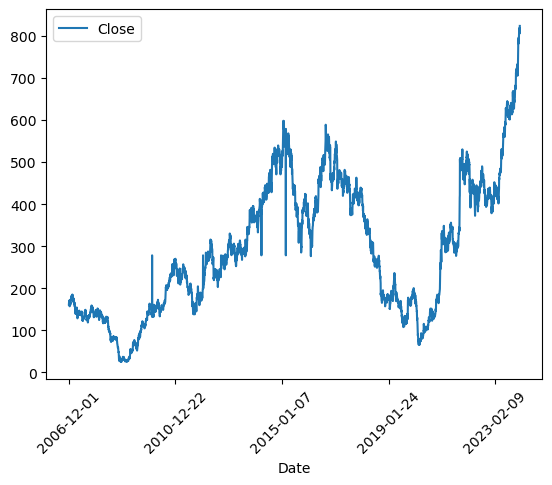

In [40]:
df.plot(x="Date", y="Close")# this plot shows the closing price of 2000 to 2020 year
plt.xticks(rotation=45)

<Axes: xlabel='Date'>

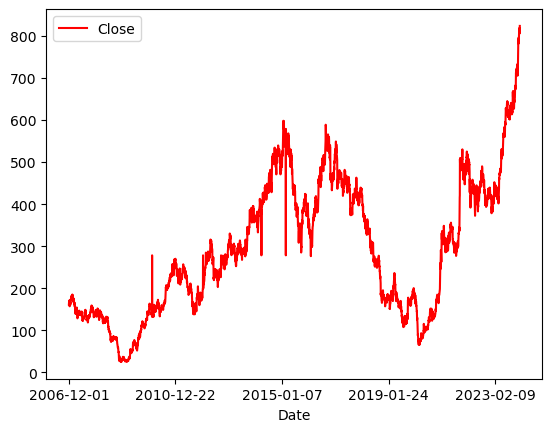

In [42]:
df.plot(x="Date", y="Close",color='red')# this plot shows the closing price of 2000 to 2020 year

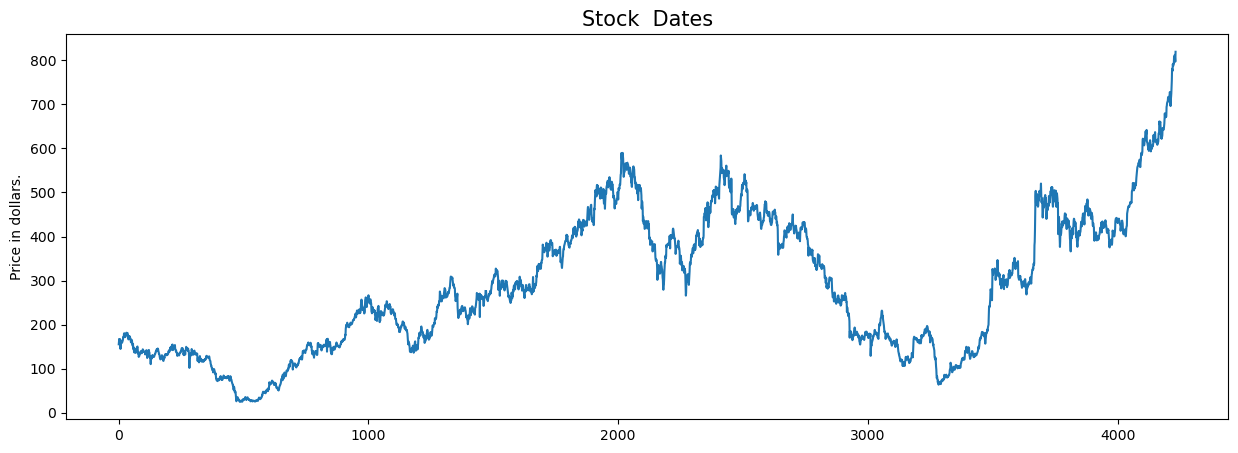

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df['Low'])
plt.title('Stock  Dates', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

## Step 3:- Data preprocessing

### :- Data Cleaning & Headling with missing values

In [12]:
df.isnull().sum().sum()#this dataset has 42 messing value 

42

In [13]:
df.isna().sum()# expact Data columns all the Column have 7 missing values

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [14]:
df.duplicated().sum() # this data set has 0 duplicated value

0

### Deal with the missing data

* ***There are two ways, we drop the missing value or replace the datas***
* ***In this data date,Adj close column this not nasser so we drop that column***

### Replace the datas

In [18]:
df['Volume'].median() # I volume median value is 10674193.0,so we fill the nan value 

10693392.5

In [19]:
df['Volume'].replace(np.nan,10674193.0,inplace=True)

In [20]:
df['Volume'].isnull().sum()# Now volume column is 0 missing value

0

In [21]:
df.isna().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       0
dtype: int64

In [22]:
Open_median=df['Open'].median() # I Open median value is 278.5,so we fill the nan value 
High_median=df['High'].median() # I Open median value is 278.5,so we fill the nan value 
Low_median=df['Low'].median() # I Open median value is 278.5,so we fill the nan value 
Close_median=df['Close'].median() # I Open median value is 278.5,so we fill the nan value
AdjClose_median=df['Adj Close'].median() # I Open median value is 278.5,so we fill the nan value 

In [23]:
print("the Open column median value is",Open_median)
print("the High column median value is",High_median)
print("the Low column median value is",Low_median)
print("the Close column median value is",Close_median)
print("the AdjClose column median value is",AdjClose_median)

the Open column median value is 278.5
the High column median value is 282.420746
the Low column median value is 272.5516205
the Close column median value is 278.2900545
the AdjClose column median value is 274.2082825


In [24]:
df['Open'].replace(np.nan,279.1804965,inplace=True)
df['High'].replace(np.nan,282.470215,inplace=True)
df['Low'].replace(np.nan,272.576355,inplace=True)
df['Close'].replace(np.nan,278.314789,inplace=True)
df['Adj Close'].replace(np.nan,274.29007,inplace=True)


In [25]:
df.isnull().sum().sum()

0

* ***Now all the null values are replaced now this Data set as 0 nan values***

In [26]:
df.shape

(4233, 7)

## Step 4:- Data Integration and Reduction

In [29]:
x = df.drop(columns=['Date', 'Open'])  # Assuming 'Date' is not a feature and 'Open' is the target variable
y = df['Open']

## step 6:- Data Splitting

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

* ***Now we split the dataset into trining and testing***

## Step 5:-Feature Scaling

In [31]:
Scaler=StandardScaler()

In [32]:
Scaler.fit(x_train)

StandardScaler()

## Step 7:- Model Training

In [33]:
lr=LinearRegression()

In [34]:
lr.fit(x_train,y_train)

LinearRegression()

* ***Now we can see the origenal data pridiction and model prediction***

## Model Evaluation

In [35]:
y_pred=lr.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.921910545531257


In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("r2_score of this Model is:-",r2_score(y_test,y_pred))

r2_score of this Model is:- 0.9996879588134863


In [38]:
# this model is 99% accurate for this dataset

In [39]:
next_day_features = x.iloc[[-1]]  # Assuming the last row contains the latest features
next_day_opening_price = lr.predict(next_day_features)
print("Predicted next day's opening price:", next_day_opening_price)


Predicted next day's opening price: [820.60207095]
